[View in Colaboratory](https://colab.research.google.com/github/burningdzire/MachineLearning/blob/master/Dimensionality_Reduction.ipynb)

# Dimensionality Reduction

### Introduction 
Lately, we are witnessing data surge and data is being generated at a tremendeous rate. Often we come across the data with too many features present in it. 

However with increase in the number of features, it gets harder to find
1. Insight about the data and
2. Visualize the data and
3. Apropriate machine learning approach to explain the model.

In such scenario we obviously would come across questions like 
1. Which attributes are important among the given set of attribute ?
2. Do we need to explore each and every attribute ?
3. How do we deal with multicollinearity ?
4. Can we use Decision tree since it can automatically select the right features for us ?
5. If we use random forest, will it get considerably slow ?
6. Are there any other machine learning algorithms which we can use in our dataset ? 

**Dimension reduction** is the process of converting high dimensional data into data with lesser dimensions but at the same time ensuring that information is not getting lost.

### Advantage of Dimension reduction
1. It helps in reducing the data storage space.
2. It reduces the computatuon time of any algorithm. Obviously less dimensions leads to less computational resources.
3. It handles multicollinearity and thereby removing redundant features.
4. Reducing the dimensions of data helps us to understand the data better. 
5. It is quite helpful in removing noise.

### Commonly employed method of dimensional reduction

1. Dropping irrelevant attributes which are not influencing the output of the model. For example let us assume that we are given with diabetes dataset. Now the `'name'` of the patient has nothing to do with whether he/she will be diabetic. So, we can remove it.  
2. Dropping columns with more than 40% missing values.
3. Handling multicollinearity by removing highly correlated attributes. For example let us consider that we are given the dataset of telephone exchange. It has two column `'total_call_mins'` (total calling minutes of user) and `'total_call_charges'` (The amount charged to the customer for calling only). Now if we know  `'total_call_mins'` we can easily find out  `'total_call_charges'` and vice versa.  So we should remove one of them. 
4. Backward Feature Elimination: In this method, we start with all n attributes. We then compute the *sum of squared error(SSE)* after each attribute(n times). Then, identifying attributes whose removal has produced the smallest increase in the SSR and removing it finally, leaving us with (n - 1) input features.
5. Forward Feature Selection: In this method, we select one variable and analyse the performance of model by adding another variable to it consequently. Slection of variable is based on higher improvement in model performance.
6. (i) Principal Component Analysis (PCA)*

    (ii) Linear Discriminant Analysis (LDA)
    
    (iii) Generalized Discriminant Analysis (GDA)
7. Decision Tree and/or Random Forest.





# Principal Component Analysis (PCA)

This method was introduced by **Karl Pearson**. Attributes are transformed into a new set of attributes, which are linear combination of actual ones. These new set of attributes are known as **principle components**. In the new set of attributes, the first attribute corresponds to the
first principal component, which is the component that explains the greatest amount of the
variance in the data.

These principle components account for most of the possible variation of original data. While the data in a higher dimensional space is mapped to data in a lower dimension space, the variance of the data in the lower dimensional space should be maximum. Also all the principal components must be orthogonal to each other.

### Finding Principal Components
1. Construct the covariance matrix of the data.
2. Find out the characterictics equation of the covariance matrix.
3. Compute the eigenvalues and eigenvectors of this matrix.
4. The eigenvector corresponding to highest eigenvalue is therefore the principal component.

### Implementing Principal Component Analysis(PCA) using sklearn

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [0]:
df = sns.load_dataset('iris')

In [40]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
df['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

### Standardize the Data
Before applying PCA , we need to scale the dataset by standard scaling technique. `StandardScaler()` helps in standardizing the dataset features such that `mean = 0` and `variance = 1.`

In [0]:
from sklearn.preprocessing import StandardScaler

x = df.loc[:, df.columns != 'species']
y = df['species']

x = StandardScaler().fit_transform(x)

In [44]:
x = pd.DataFrame(x, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [45]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [0]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
x = model.fit_transform(x)
df_final = pd.DataFrame(x, columns = ['first_principal_component', 'second_principal_component'])

In [0]:
df_final = pd.concat([df_final, df['species']], axis = 1)

In [50]:
df_final.head()

,first_principal_component,second_principal_component,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


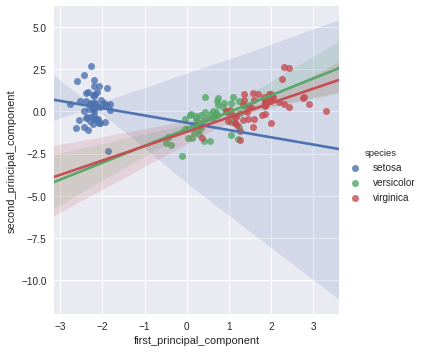

In [56]:
sns.lmplot(x = 'first_principal_component', y = 'second_principal_component', data = df_final, hue = 'species')